## Covid19 database

# origin:
https://documenter.getpostman.com
this API is offered by postman, which is a client software for making API requests. the API works on postman but also on any browser or implemented code.
I implemented this API functions on jupyterl ab for a better visualisation, but they code should be the same for a python code.

# Functions:
4 functions are implemented:
-getallcoviddata():
this function loads all daily datas from the server for every country from the beginning until today.
-getworldcoviddata(startdate, enddate):
this function loads the daily datas for all countries in a specific times interval

The 2 next function are very similar, used to loads datas for a specific country, but both are needed in case the data are separated on different provinces (examples for countries that have provinces separated data: china, france)

-getcountry_withoutprovinces_coviddata(country, startdate, enddate):
This function loads daily datas for a specific country in a specific time interval.

-getcountrycoviddata(country, startdate, enddate):
This function loads daily datas for different provinces related to a specific country in a specific time interval.
The summer of daily datas of the provinces is the data for this country.

# Advantages:
-The function are the easy to use and all the responses have a predefined panda array format.
-The datas are every day updated.
-The samples are daily separated.
-The data are available for almost every country in the world.

# Disadvantages:
-the functions need internet to load the data, save the data in a csv file can solve this problem.

In [5]:
import pandas as pd

startdate = '2020-02-01'
enddate = '2020-06-01'
def getcountrycoviddata(country, startdate, enddate):
    import requests
    import json
    response = requests.get("https://api.covid19api.com/country/"+country+"?from="+startdate+"T00:00:00Z&to="+enddate+"T00:00:00Z")
    # Print the status code of the response.
    data = json.loads(response.content)
    pd_data = pd.read_json(response.content)
    pd_data = pd_data.drop(columns=['Lat', 'Lon', 'City', 'CityCode'])
    return pd_data
def getcountry_withoutprovinces_coviddata(country, startdate, enddate):
    import requests
    import json
    response = requests.get("https://api.covid19api.com/country/"+country+"?from="+startdate+"T00:00:00Z&to="+enddate+"T00:00:00Z")
    # Print the status code of the response.
    data = json.loads(response.content)
    pd_data = pd.read_json(response.content)
    pd_data = pd_data.drop(columns=['Lat', 'Lon', 'City', 'CityCode'])
    pd_data = pd_data.loc[pd_data['Province'] == '']
    return pd_data
def getworldcoviddata(startdate, enddate):
    import requests
    import json
    response = requests.get("https://api.covid19api.com/world?from="+startdate+"T00:00:00Z&to="+enddate+"T00:00:00Z")
    # Print the status code of the response.
    data = json.loads(response.content)
    pd_data = pd.read_json(response.content)
    return pd_data
def getallcoviddata(): #this function takes time because it download 10MB of data
    import requests
    import json
    response = requests.get("https://api.covid19api.com/all")
    # Print the status code of the response.
    data = json.loads(response.content)
    pd_data = pd.read_json(response.content)
    pd_data = pd_data.drop(columns=['Lat', 'Lon', 'City', 'CityCode'])
    return pd_data

In [6]:
brazil = getcountrycoviddata('brazil', startdate, enddate)
canada = getcountrycoviddata('canada', startdate, enddate)
tunisia = getcountrycoviddata('tunisia', startdate, enddate)
afghanistan = getcountrycoviddata('afghanistan', startdate, enddate)
italy = getcountrycoviddata('italy', startdate, enddate)
spain = getcountrycoviddata('spain', startdate, enddate)
china = getcountrycoviddata('china', startdate, enddate)

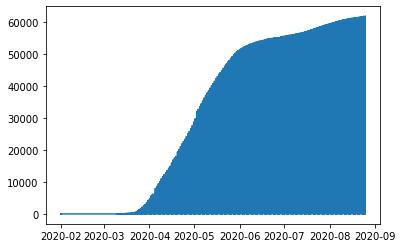

In [26]:
import matplotlib.pyplot as plt
plt.plot(canada['Date'], canada['Confirmed'])

In [3]:
data = pd.concat([germany, tunisia,afghanistan, italy, spain], axis=0, join='inner')
data

,Country,CountryCode,Province,Confirmed,Deaths,Recovered,Active,Date
0,Germany,DE,,8,0,0,8,2020-02-01 00:00:00+00:00
1,Germany,DE,,10,0,0,10,2020-02-02 00:00:00+00:00
2,Germany,DE,,12,0,0,12,2020-02-03 00:00:00+00:00
3,Germany,DE,,12,0,0,12,2020-02-04 00:00:00+00:00
4,Germany,DE,,12,0,0,12,2020-02-05 00:00:00+00:00
...,...,...,...,...,...,...,...,...
202,Spain,ES,,386054,28838,150376,206840,2020-08-21 00:00:00+00:00
203,Spain,ES,,386054,28838,150376,206840,2020-08-22 00:00:00+00:00
204,Spain,ES,,386054,28838,150376,206840,2020-08-23 00:00:00+00:00
205,Spain,ES,,405436,28872,150376,226188,2020-08-24 00:00:00+00:00


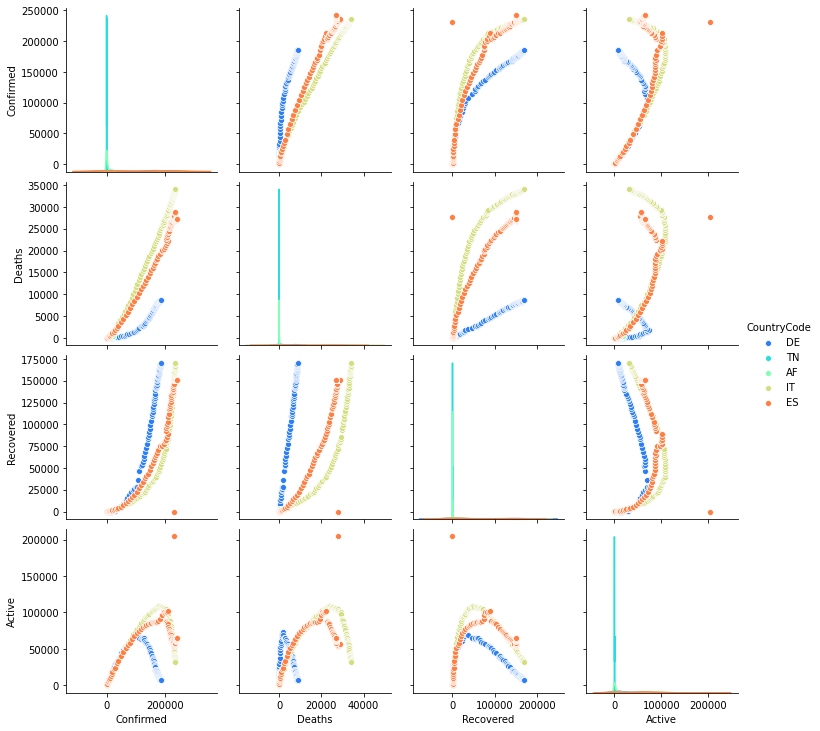

In [4]:
import seaborn as sns
#data = data.drop(columns=['Country', 'Date', 'City', 'Province', 'CityCode'])
sns.pairplot(data,hue='CountryCode',palette='rainbow')